In [1]:
import os
os.environ["KERAS_BACKEND"] = 'plaidml.keras.backend'

from keras.layers import Conv2D, Activation, Dropout, MaxPool2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Using plaidml.keras.backend backend.


In [122]:
DATASET_DIR = '/Users/gabriel/datasets/handwrite_equations/extracted_images/'
MODELS_DIR = '../model/'

CLASSES = sorted(os.listdir(DATASET_DIR))

IMG_SIZE = (45, 45)

BATCH_SIZE = 32

# Image methods

In [3]:
def imshow(img_dir):
    img = np.asarray(Image.open(img_dir)) / 255.
    print(img.shape)
    plt.imshow(img)

In [4]:
def tensorToImage(tensor):
    img = np.array(tensor) / 255.
    if img.shape > 3:
        img = img[0]
    plt.imshow(img)

(45, 45)


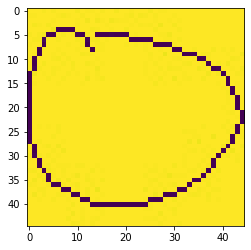

In [5]:
imshow(os.path.join(DATASET_DIR, "0/0_10267.jpg"))

# Generators

In [6]:
from keras.preprocessing.image import ImageDataGenerator

def create_generators():
    datagen = ImageDataGenerator(rescale=1/255., validation_split=.2)
    
    train_generator = datagen.flow_from_directory(DATASET_DIR, 
                                                        color_mode='grayscale',
                                                        target_size=IMG_SIZE, 
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical',
                                                        subset='training')
    
    validation_generator = datagen.flow_from_directory(DATASET_DIR, 
                                                        color_mode='grayscale',
                                                        target_size=IMG_SIZE, 
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical',
                                                        subset='validation')
    return train_generator, validation_generator
    

# Build model

In [7]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=IMG_SIZE+(1,), name='conv1'))
    model.add(Activation('relu'))
    model.add(MaxPool2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), name='conv2'))
    model.add(Activation('relu'))
    model.add(MaxPool2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), name='conv3'))
    model.add(Activation('relu'))
    model.add(MaxPool2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(len(CLASSES)-1))
    model.add(Activation('softmax'))
    model.summary()
    return model

# Train model

In [8]:
def compile_model(model, history):
    model.compile(loss='categorical_crossentropy',
                 optimizer=Adam(lr=1e-3),
                 metrics=['acc'])

In [9]:
train_generator, val_generator = create_generators()

Found 300813 images belonging to 82 classes.
Found 75161 images belonging to 82 classes.


In [10]:
model = create_model()
history = []
compile_model(model, history)

INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 43, 43, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 43, 43, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 19, 19, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 19, 19, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
__________

In [11]:
model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=BATCH_SIZE)

Epoch 1/20
9401/9401 [==============================] - 231s 25ms/step - loss: 0.6323 - acc: 0.8202 - val_loss: 0.4039 - val_acc: 0.8848
Epoch 2/20
9401/9401 [==============================] - 236s 25ms/step - loss: 0.3641 - acc: 0.8874 - val_loss: 0.2277 - val_acc: 0.9248
Epoch 3/20
9401/9401 [==============================] - 231s 25ms/step - loss: 0.3123 - acc: 0.9010 - val_loss: 0.2198 - val_acc: 0.9365
Epoch 4/20
9401/9401 [==============================] - 229s 24ms/step - loss: 0.2843 - acc: 0.9088 - val_loss: 0.2062 - val_acc: 0.9326
Epoch 5/20
9401/9401 [==============================] - 230s 24ms/step - loss: 0.2668 - acc: 0.9137 - val_loss: 0.2062 - val_acc: 0.9277
Epoch 6/20
9401/9401 [==============================] - 230s 24ms/step - loss: 0.2533 - acc: 0.9177 - val_loss: 0.1653 - val_acc: 0.9424
Epoch 7/20
9401/9401 [==============================] - 229s 24ms/step - loss: 0.2437 - acc: 0.9204 - val_loss: 0.1527 - val_acc: 0.9463
Epoch 8/20
9401/9401 [===================

In [12]:
history = _

In [14]:
history.history.items()

dict_items([('val_loss', [0.4038995965383947, 0.2277327971532941, 0.21979263331741095, 0.20620038034394383, 0.20623883791267872, 0.16526818473357707, 0.15268676087725908, 0.18975505756679922, 0.16743524512276053, 0.15691804309608415, 0.15122015762608498, 0.17024522519204766, 0.13423235865775496, 0.14087688556173816, 0.14140133644104935, 0.14434163202531636, 0.11529387964401394, 0.16960013238713145, 0.13036797137465328, 0.12490331887966022]), ('val_acc', [0.884765625, 0.9248046875, 0.9365234375, 0.9326171875, 0.927734375, 0.9423828125, 0.9462890625, 0.9375, 0.9482421875, 0.947265625, 0.9404296875, 0.947265625, 0.9501953125, 0.9560546875, 0.94921875, 0.94921875, 0.9677734375, 0.947265625, 0.9619140625, 0.9609375]), ('loss', [0.6323520623421349, 0.3641644047029096, 0.3122708150007546, 0.28428047640931375, 0.2667697241782563, 0.25327380871365124, 0.2436966587641686, 0.23566125910808242, 0.22869867958665402, 0.22346523467473364, 0.21892542397739376, 0.2166877183559598, 0.2142765051187697, 0

In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# History Graph

In [57]:
model.save(os.path.join(MODELS_DIR, "modelv1"))


from keras.models import load_model
model = load_model(os.path.join(MODELS_DIR, "modelv1"))

In [91]:
def plot_history(history):
    x = [i for i in range(1, len(history['acc'])+1)]
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0].plot(x, np.array(history['acc']), label='accuracy')
    ax[0].plot(x, np.array(history['loss']), label='loss')
    ax[0].set_title("Training")
    ax[0].legend()
    
    ax[1].plot(x, np.array(history['val_acc']), label='accuracy')
    ax[1].plot(x, np.array(history['val_loss']), label='loss')
    ax[1].set_title("Validation")
    ax[1].legend()

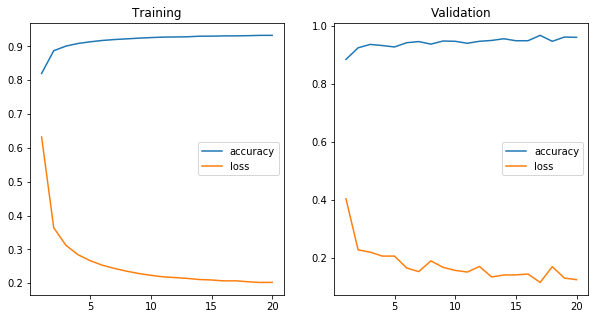

In [92]:
plot_history(history.history)

# Predict

In [164]:
image = np.array(Image.open(os.path.join(DATASET_DIR, "0/0_10267.jpg")))
image = image / 255.
image = image.reshape(1, 45, 45, 1)
print(CLASSES[np.argmax(model.predict(image))])

0


In [183]:
def plot_model_predict(model):
    rows, cols = (4, 4)
    fig, ax = plt.subplots(rows, cols, figsize=(15, 15))
    for i in range(0, rows):
        for j in range(0, cols):
            image_class = CLASSES[np.random.randint(len(CLASSES))]
            image_class_dir = os.path.join(DATASET_DIR, image_class)
            image_name = os.listdir(image_class_dir)[np.random.randint(len(os.listdir(image_class_dir)))]
            image = Image.open(os.path.join(image_class_dir, image_name))
            ax[i, j].imshow(image)
            predicted = model.predict(np.array(image).reshape(1, IMG_SIZE[0], IMG_SIZE[1], 1))
            ax[i, j].set_title("class: {0} ({1:2f}%)".format(CLASSES[np.argmax(predicted)], np.argmax(predicted)/100))
    

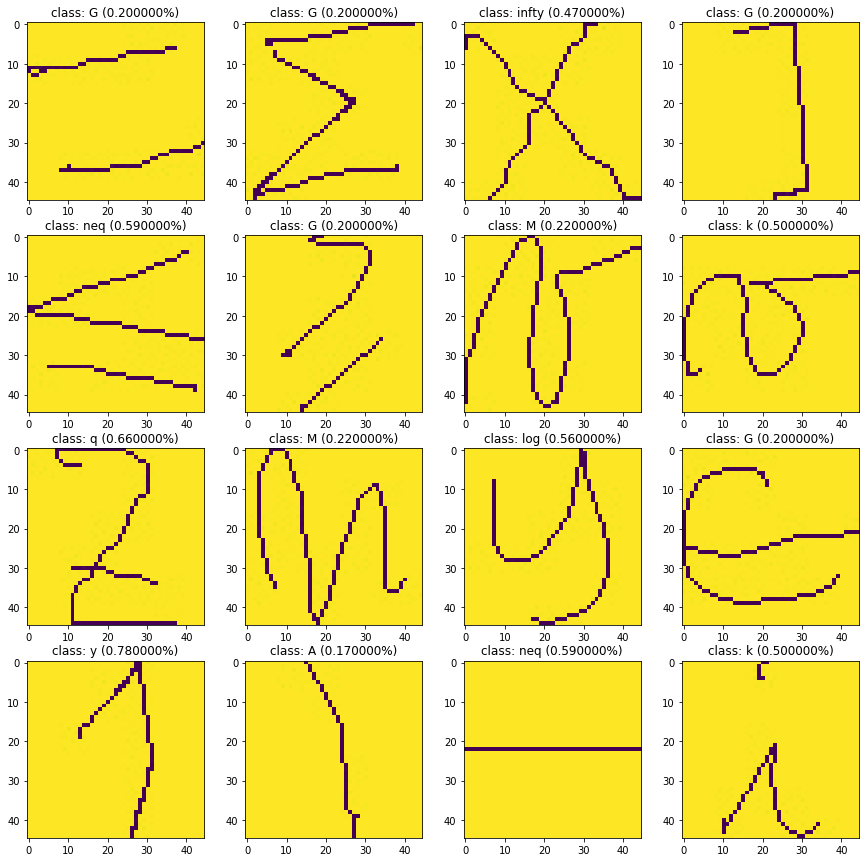

In [187]:
plot_model_predict(model)